In [37]:
# !pip install anthropic
# !pip install google-generativeai
# !pip install openai

In [7]:
import pandas as pd
import anthropic
import textwrap

In [219]:
ANT_KEY = ""

In [220]:
GEMINI_KEY = ""

In [221]:
GPT_KEY = ""

In [41]:
client = anthropic.Anthropic(
    api_key=ANT_KEY
)

In [222]:
def run_prompt_claude(msg: str, model="claude-3-haiku-20240307"):
    categories = textwrap.dedent("""<category> 
    <label>NEGATIVE</label>
    <content>an attitude or view that is critical or disapproving of a particular thing, individual or situation
    </content> 
</category>
<category> 
    <label>NEUTRAL</label>
    <content>
    the sentiment is neither positive or negative, or it is equally positive and negative
    </content> 
</category>
<category> 
    <label>POSITIVE</label>
    <content>
    hopeful and confident, and think of the good aspects of a situation rather than the bad ones
    </content> 
</category>
""")
    prompt = textwrap.dedent("""
        You will classify a user tweet into one of the following categories:
    <categories>
        {{categories}}
    </categories>

    Here is the user tweet:
    <tweet>
        {{ticket}}
    </tweet>

    Respond with just the label of the category between category tags.
    """).replace("{{categories}}", categories).replace("{{ticket}}", msg)
    response = client.messages.create( 
        messages=[{"role":"user", "content": prompt}, {"role":"assistant", "content": "<category>"}],
        stop_sequences=["</category>"], 
        top_k=1,
        max_tokens=4096, 
        temperature=0.0,
        model=model,
    )
    result = response.content[0].text.strip()
    return result


In [147]:
run_prompt_claude("Today is a good day")

'POSITIVE'

In [116]:
run_prompt_claude("I am going for a walk")

'NEUTRAL'

In [117]:
run_prompt_claude("I really love when the API is constantly lagging")

'NEGATIVE'

In [20]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_KEY)

In [145]:
def run_prompt_gem(msg: str, model="gemini-1.5-flash"):
    categories = textwrap.dedent("""<category> 
    <label>NEGATIVE</label>
    <content>an attitude or view that is critical or disapproving of a particular thing, individual or situation
    </content> 
</category>
<category> 
    <label>NEUTRAL</label>
    <content>
    the sentiment is neither positive or negative, or it is equally positive and negative
    </content> 
</category>
<category> 
    <label>POSITIVE</label>
    <content>
    hopeful and confident, and think of the good aspects of a situation rather than the bad ones
    </content> 
</category>
""")
    prompt = textwrap.dedent("""
        You will classify a user tweet into one of the following categories:
    <categories>
        {{categories}}
    </categories>

    Here is the user tweet:
    <tweet>
        {{ticket}}
    </tweet>

    Respond with just the label of the category between category tags.

    <category>
    """).replace("{{categories}}", categories).replace("{{ticket}}", msg)
    model = genai.GenerativeModel(model)
    response = model.generate_content(
    prompt,
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["</category>"],
        max_output_tokens=64,
        temperature=0.0,
    ),
)
    result = response.text.strip()
    return result

In [99]:
run_prompt_gem("Today is a good day")

'POSITIVE'

In [100]:
run_prompt_gem("Today is a bad day")

'NEGATIVE'

In [101]:
run_prompt_gem("I really love when the API is constantly lagging")

'NEGATIVE'

In [102]:
run_prompt_gem("I am going for a walk")

'NEUTRAL'

In [43]:
from openai import OpenAI
gpt_client = OpenAI(api_key=GPT_KEY)

In [143]:
def run_prompt_gpt(msg: str, model="gpt-4o"):
    categories = textwrap.dedent("""<category> 
    <label>NEGATIVE</label>
    <content>an attitude or view that is critical or disapproving of a particular thing, individual or situation
    </content> 
</category>
<category> 
    <label>NEUTRAL</label>
    <content>
    the sentiment is neither positive or negative, or it is equally positive and negative
    </content> 
</category>
<category> 
    <label>POSITIVE</label>
    <content>
    hopeful and confident, and think of the good aspects of a situation rather than the bad ones
    </content> 
</category>
""")
    prompt = textwrap.dedent("""
    You will classify a user tweet into one of the following categories:
    <categories>
        {{categories}}
    </categories>

    Here is the user tweet:
    <tweet>
        {{ticket}}
    </tweet>

    Respond with just the label of the category between category tags.
    """).replace("{{categories}}", categories).replace("{{ticket}}", msg)
    response = gpt_client.chat.completions.create( 
        messages=[{"role":"user", "content": [{"type":"text", "text": prompt}]},
                  {"role":"assistant", "content": [{"type": "text", "text": "<category>"}]}
                 ],
        stop=["</category>"], 
        temperature=0.0,
        model=model,
          max_completion_tokens=64,
          top_p=1
    )
    result = response.choices[0].message.content.strip()
    return result


In [144]:
run_prompt_gpt("Today is a good day")

'POSITIVE'

In [111]:
run_prompt_gpt("Today is a bad day")

'NEGATIVE'

In [112]:
run_prompt_gpt("I really love when the API is constantly lagging")

'NEGATIVE'

In [113]:
run_prompt_gpt("I am going for a walk")

'<category>NEUTRAL'

In [142]:
def run_prompt_gpt2(msg, model="gpt-4o"):
    response = gpt_client.chat.completions.create(
      model=model,
      messages=[
    {
      "role": "system",
      "content": "You will be provided with a tweet, and your task is to classify its sentiment as POSITIVE, NEUTRAL, or NEGATIVE."
    },
    {
      "role": "user",
      "content": msg
    }
  ],
  temperature=0.0,
          max_completion_tokens=64,
  top_p=1
        
)
    result = response.choices[0].message.content.strip()
    return result

In [136]:
run_prompt_gpt2("Today is a good day")

'POSITIVE'

In [137]:
run_prompt_gpt2("Today is a bad day")

'NEGATIVE'

In [138]:
run_prompt_gpt2("I really love when the API is constantly lagging")

'NEGATIVE'

In [139]:
run_prompt_gpt2("I am going for a walk")

'NEUTRAL'

# Let's explore our data to process

In [129]:
from matplotlib import pyplot as plt

In [121]:
df_sent = pd.DataFrame(
    dict(
        text=pd.read_csv("data_small.csv", usecols=['text'])['text'],
        label=pd.read_csv('data_sent.csv', usecols=['label'])['label'].str.upper()
    )
)

In [122]:
df_sent.head()

,text,label
0,@VivekGRamaswamy Biden is backing them?,NEUTRAL
1,@BillAckman @POTUS @KamalaHarris @DNC One can ...,NEUTRAL
2,@atensnut @BillAckman @POTUS @KamalaHarris @DN...,NEUTRAL
3,@Raymond26773481 @BillAckman @POTUS @KamalaHar...,POSITIVE
4,@glennbeck GOP led House controls FEMA spendin...,NEGATIVE


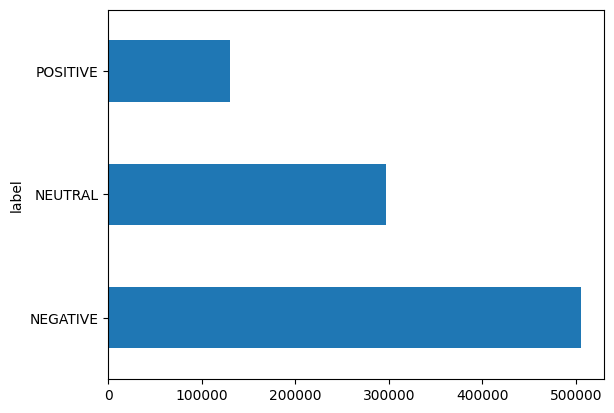

In [130]:
df_sent['label'].value_counts().plot.barh()
plt.plot();

In [141]:
for label in ["NEUTRAL", "POSITIVE", "NEGATIVE"]:
    print("#######")
    msg = df_sent.text[df_sent.label == label].values[0]
    print("Label:", label)
    print("## Msg start:")
    print(msg)
    print("## Msg end:")
    print("ChatGPT")
    print(run_prompt_gpt(msg))
    print("ChatGPT2")
    print(run_prompt_gpt2(msg))
    print("Claude")
    print(run_prompt_claude(msg))
    print("Gemini")
    print(run_prompt_gem(msg))
    print()

#######
Label: NEUTRAL
## Msg start:
@VivekGRamaswamy Biden is backing them?
## Msg end:
ChatGPT
<category>NEUTRAL
ChatGPT2
NEUTRAL
Claude
NEUTRAL
Gemini
<category>NEUTRAL

#######
Label: POSITIVE
## Msg start:
@Raymond26773481 @BillAckman @POTUS @KamalaHarris @DNC Unreal!!
## Msg end:
ChatGPT
<category>NEUTRAL
ChatGPT2
NEUTRAL
Claude
NEGATIVE
Gemini
NEGATIVE

#######
Label: NEGATIVE
## Msg start:
@glennbeck GOP led House controls FEMA spending &amp; budgeting.

FEMA is short on funds because House MAGAs don't believe in climate change &amp; don't know how to budget.
## Msg end:
ChatGPT
NEGATIVE
ChatGPT2
NEGATIVE
Claude
NEGATIVE
Gemini
NEGATIVE



# Let's get to pricing
# ChatGPT OpenAI
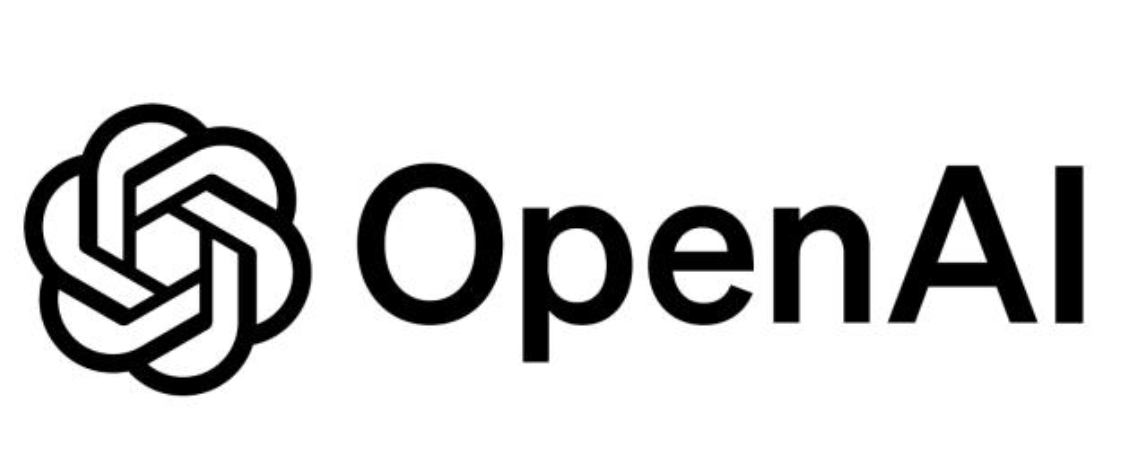
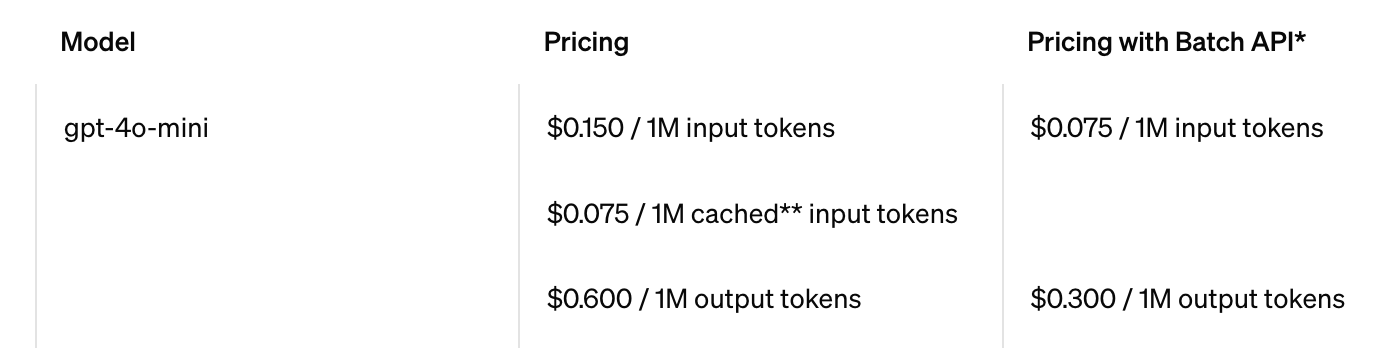
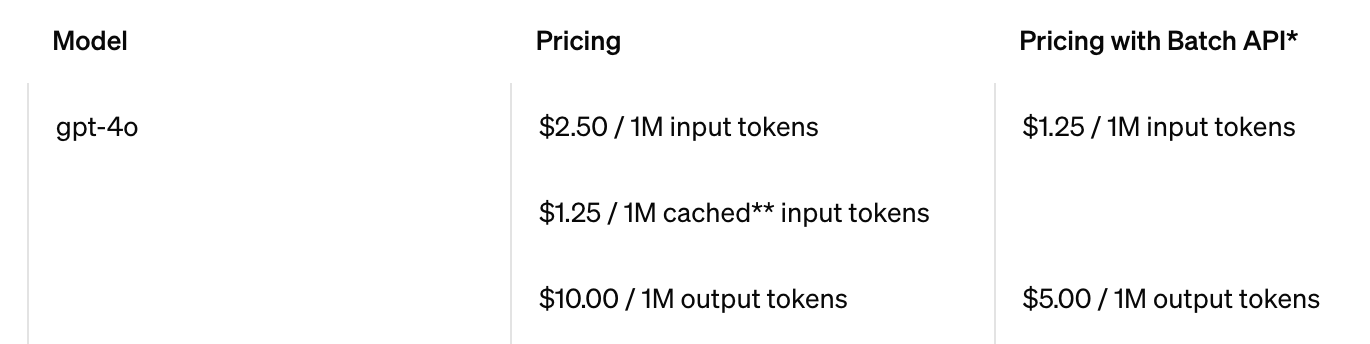
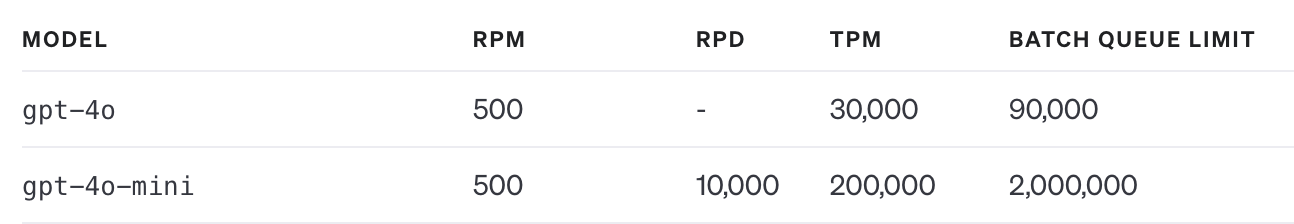

# Anthropic Claude
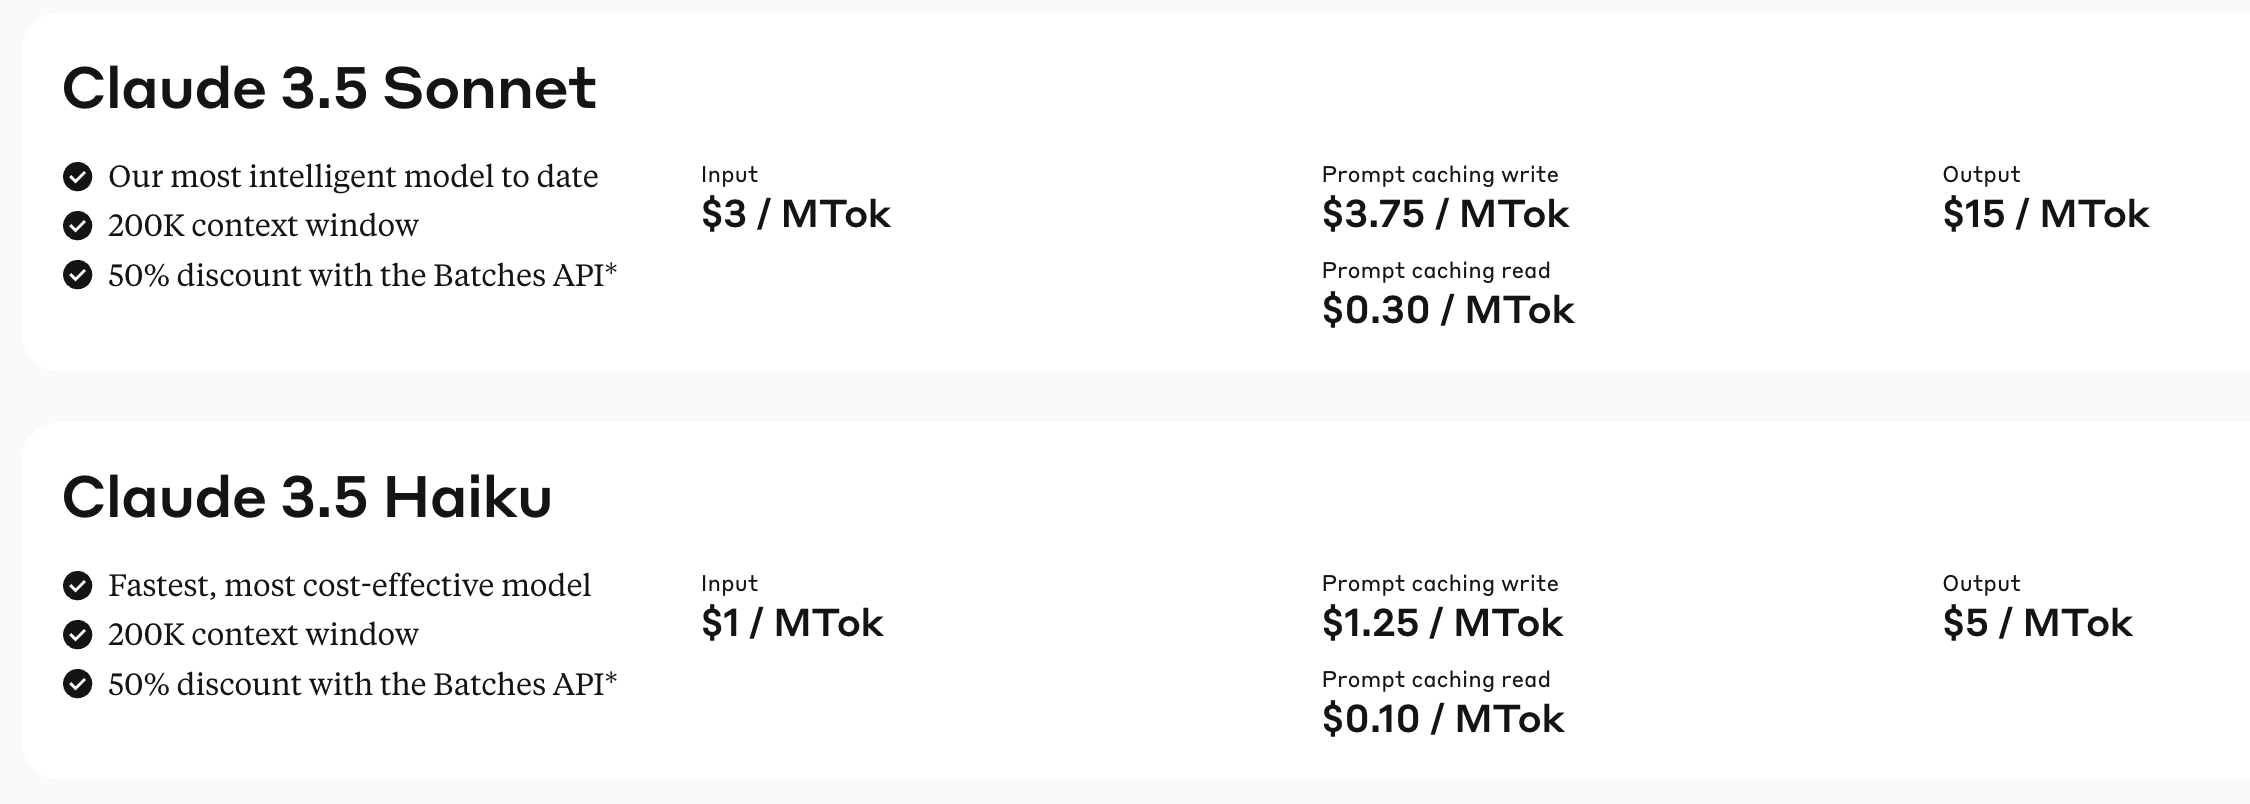
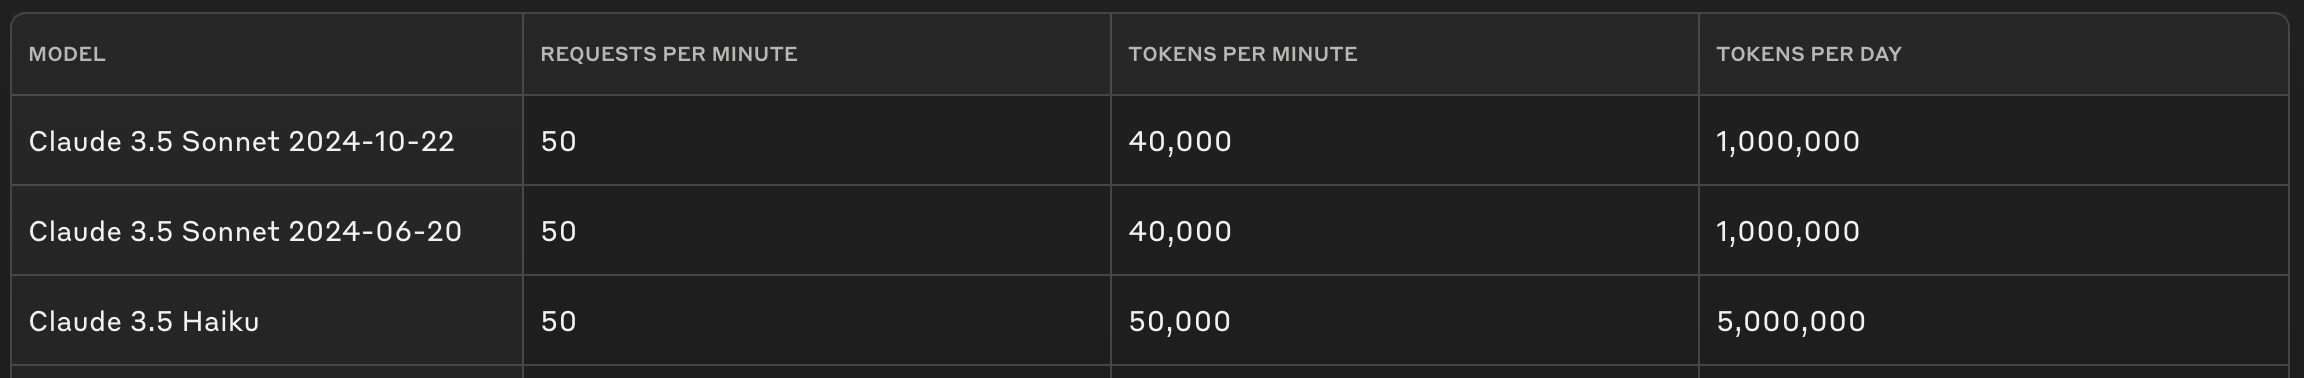

# Google Gemini

## Gemini 1.5 Flash
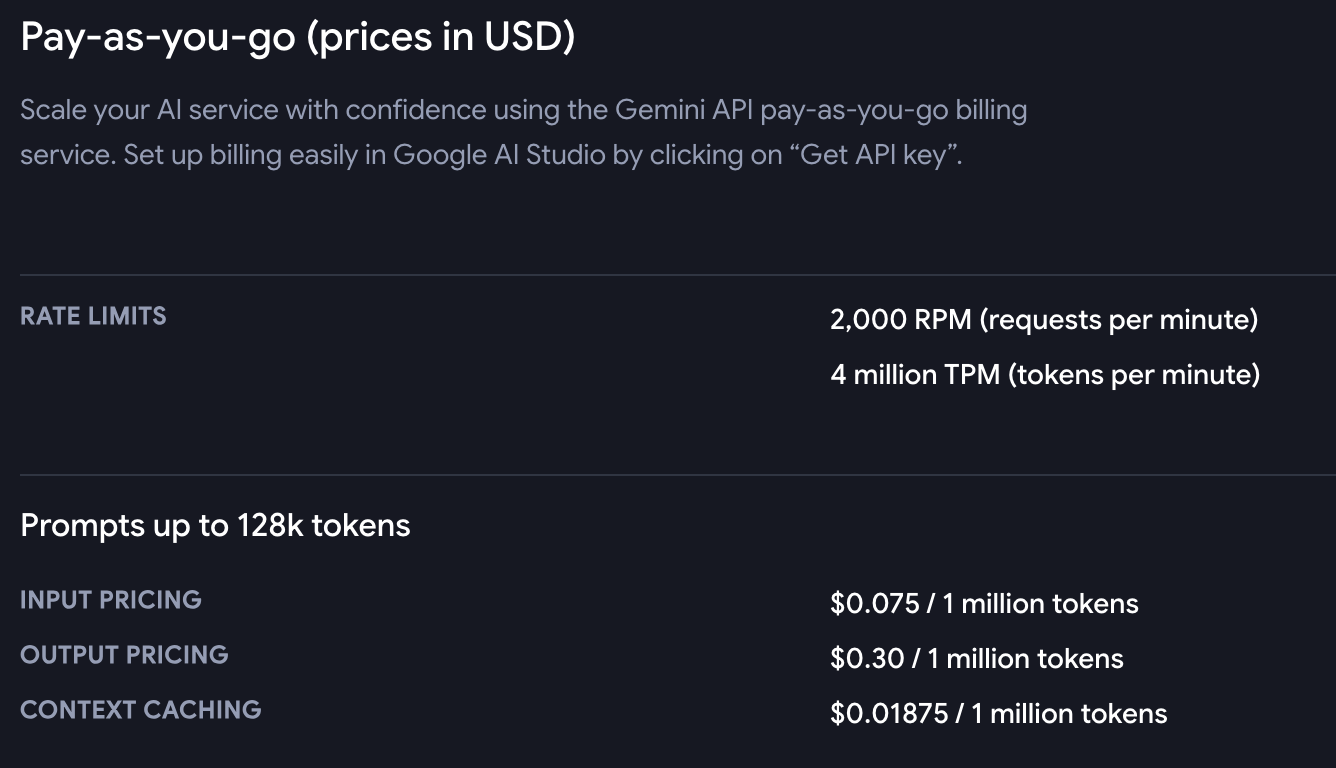
## Gemini 1.5 Pro
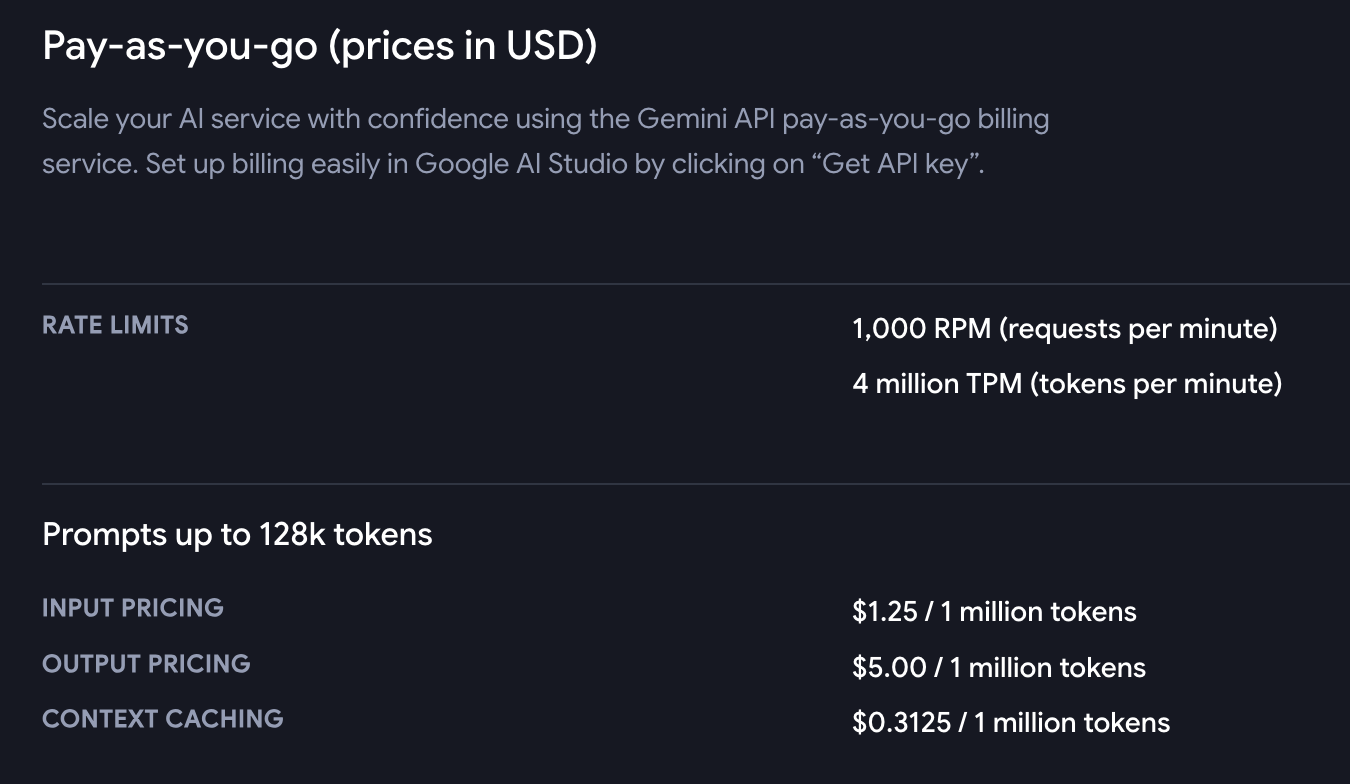

In [148]:
models = [
    # gpt
    (run_prompt_gpt, "gpt-4o"),
    (run_prompt_gpt, "gpt-4o-mini"),
    # claude
    (run_prompt_claude, "claude-3-5-sonnet-latest"),
    (run_prompt_claude, "claude-3-5-haiku-latest"),
    # gem
    (run_prompt_gem, "gemini-1.5-flash"),
    (run_prompt_gem, "gemini-1.5-pro"),    
]
for f, model_name in models:
    print(f("I really hate when it rains", model_name))

NEGATIVE
<NEGATIVE>
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE


In [171]:
test_data = []
test_data_pseudo_label = []

In [172]:
sub_data = {
    label: df_sent.text[df_sent.label == label].values for label in ["NEUTRAL", "POSITIVE", "NEGATIVE"]
}
for i in range(0, 1000):
    for label in ["NEUTRAL", "POSITIVE", "NEGATIVE"]:
        msg = sub_data[label][-i]
        test_data.append(msg)        
        test_data_pseudo_label.append(label)

In [158]:
import time

In [168]:
from tqdm.notebook import trange

In [177]:
import json

In [196]:
from multiprocessing import Manager
from threading import Thread
from time import sleep

manager = Manager()
d = manager.dict()

In [213]:
def helper_f(f, model_name, d, test_data):
    for i in range(len(test_data)):
        key = (model_name, i)
        if key in d:
            continue
        while True:
            # print(key)
            try:
                d[key] = f(test_data[i], model_name)
                break
            except Exception as e:
                print("E mode", key)
                print("E:", e)
                time.sleep(15)
                continue

t_list = []
for f, model_name in models:
    t_list.append(Thread(target=helper_f,args=(f, model_name, d, test_data)))
for t in t_list:
    t.start()
for t in t_list:
    t.join()

E mode ('claude-3-5-haiku-latest', 2244)
E: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'Number of requests has exceeded your per-minute rate limit (https://docs.anthropic.com/en/api/rate-limits); see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}
E mode ('claude-3-5-haiku-latest', 2271)
E: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'Number of requests has exceeded your per-minute rate limit (https://docs.anthropic.com/en/api/rate-limits); see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}


KeyboardInterrupt: 

E mode ('claude-3-5-haiku-latest', 2313)
E: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'Number of requests has exceeded your per-minute rate limit (https://docs.anthropic.com/en/api/rate-limits); see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}
E mode ('claude-3-5-haiku-latest', 2402)
E: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'Number of requests has exceeded your per-minute rate limit (https://docs.anthropic.com/en/api/rate-limits); see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}
E mode ('claude-3-

In [215]:
with open("models_results.json","w") as f:
    json.dump({m + "__" + str(idx): r for (m, idx), r in d.items()}, f)